In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [10]:
!ls ..

 CoVID-19_Dashboard_Data.csv
'Cumulative Tests over Time by County.xlsx'
 Prison_Notebook
 Robinhood_Review
 SBA_PPP_Notebook_Work
'Texas COVID-19 Active Case Data by County.xlsx'
'Texas COVID-19 Case Count Data by County.xlsx'
'Texas COVID-19 Fatality Count Data by County.xlsx'
'Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx'
'Texas Hospital Capacity over Time by TSA Region.xlsx'
 Texas_Covid_Data_Notebook
 Texas_Prison_Notebook_Work
 jup_work
 nohup.out
 working


In [11]:
df_tests = pd.read_excel("../Cumulative Tests over Time by County.xlsx",header=1)

In [12]:
df_tests[df_tests["County"] == 'Bexar']

,County,Tests Through April 21,Tests Through April 22,Tests Through April 23,Tests Through April 24,Tests Through April 25,Tests Through April 26,Tests Through April 27,Tests Through April 28,Tests Through April 29,...,Tests Through June 30,Tests Through July 1,Tests Through July 2,Tests Through July 3,Tests Through July 4,Tests Through July 5,Tests Through July 6,Tests Through July 7,Tests Through July 8,Tests Through July 9
14,Bexar,10274.0,10804.0,11020.0,9231.0,9316.0,9501.0,9584.0,9667.0,10014.0,...,78923.0,80586.0,82135.0,85063.0,89087.0,91707.0,94612.0,96796.0,98687.0,109810.0


In [13]:
df_tests[:5]

,County,Tests Through April 21,Tests Through April 22,Tests Through April 23,Tests Through April 24,Tests Through April 25,Tests Through April 26,Tests Through April 27,Tests Through April 28,Tests Through April 29,...,Tests Through June 30,Tests Through July 1,Tests Through July 2,Tests Through July 3,Tests Through July 4,Tests Through July 5,Tests Through July 6,Tests Through July 7,Tests Through July 8,Tests Through July 9
0,Anderson,270.0,282.0,297.0,329.0,337.0,337.0,360.0,360.0,397.0,...,6591.0,7091.0,8000.0,10982.0,11017.0,11037.0,11081.0,11281.0,11313.0,11383.0
1,Andrews,2.0,2.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,...,138.0,139.0,140.0,140.0,147.0,169.0,184.0,184.0,202.0,205.0
2,Angelina,282.0,311.0,431.0,434.0,469.0,468.0,544.0,552.0,626.0,...,4190.0,4512.0,4651.0,4712.0,4756.0,4821.0,4962.0,4987.0,5126.0,5139.0
3,Aransas,16.0,17.0,15.0,24.0,27.0,27.0,27.0,27.0,28.0,...,385.0,403.0,412.0,412.0,417.0,433.0,450.0,463.0,484.0,485.0
4,Archer,8.0,9.0,13.0,18.0,20.0,20.0,20.0,20.0,20.0,...,101.0,104.0,107.0,108.0,106.0,107.0,112.0,112.0,115.0,115.0


In [14]:
a = df_tests.set_index('County')

In [15]:
b = a.T.TOTAL[a.columns[1:]]

In [16]:
b

Tests Through April 22         216783
Tests Through April 23         225078
Tests Through April 24         242547
Tests Through April 25         262816
Tests Through April 26         276021
                             ...     
Tests Through July 5      2.37171e+06
Tests Through July 6      2.43186e+06
Tests Through July 7      2.47103e+06
Tests Through July 8      2.52694e+06
Tests Through July 9       2.6039e+06
Name: TOTAL, Length: 79, dtype: object

In [17]:
for x in range(-55,0,1):
    print(x, x-1)
    print(b.index[x], b[x]- b[x-1])

-55 -56
Tests Through May 16 32479.0
-54 -55
Tests Through May 17 14805.0
-53 -54
Tests Through May 18 29737.0
-52 -53
Tests Through May 19 21924.0
-51 -52
Tests Through May 20 25304.0
-50 -51
Tests Through May 21 30192.0
-49 -50
Tests Through May 22 34004.0
-48 -49
Tests Through May 23 36498.0
-47 -48
Tests Through May 24 15419.0
-46 -47
Tests Through May 25 19720.0
-45 -46
Tests Through May 26 37165.0
-44 -45
Tests Through May 27 18622.0
-43 -44
Tests Through May 28 28133.0
-42 -43
Tests Through May 29 37455.0
-41 -42
Tests Through May 30 27344.0
-40 -41
Tests Through May 31 18698.0
-39 -40
Tests Through June 1 20185.0
-38 -39
Tests Through June 2 23598.0
-37 -38
Tests Through June 3 33594.0
-36 -37
Tests Through June 4 24080.0
-35 -36
Tests Through June 5 34239.0
-34 -35
Tests Through June 6 9768.0
-33 -34
Tests Through June 7 36944.0
-32 -33
Tests Through June 8 30240.0
-31 -32
Tests Through June 9 15910.0
-30 -31
Tests Through June 10 46844.0
-29 -30
Tests Through June 11 21238.0


In [18]:
b[-1] - b[-2]

76963.0

In [19]:
b.index[-18][14:]

'June 22'

In [20]:
type(b)

pandas.core.series.Series

In [21]:
for z in b.index:
    print(z[14:])
for z in b.index:
    if z.endswith('*'):
        print(z[:-1])

April 22
April 23
April 24
April 25
April 26
April 27
April 28
April 29
April 30
May 1
May 2
May 3
May 4
May 5*
May 6
May 7
May 8
May 9
May 10
May 11
May 12
May 13
May 14
May 15
May 16
May 17
May 18
May 19
May 20
May 21
May 22
May 23
May 24
May 25
May 26
May 27
May 28
May 29
May 30
May 31
June 1
June 2
June 3
June 4
June 5
June 6
June 7
June 8
June 9
June 10
June 11
June 12
June 13
June 14
June 15
June 16
June 17
June 18
June 19
June 20
June 21
June 22
June 23
June 24
June 25
June 26
June 27
June 28
June 29
June 30
July 1
July 2
July 3
July 4
July 5
July 6
July 7
July 8
July 9
Tests Through May 5


In [22]:
for z in b.index:
    if z.endswith('*'):
        z = (z[:-1]) #address May 5*
    print(z[14:])

April 22
April 23
April 24
April 25
April 26
April 27
April 28
April 29
April 30
May 1
May 2
May 3
May 4
May 5
May 6
May 7
May 8
May 9
May 10
May 11
May 12
May 13
May 14
May 15
May 16
May 17
May 18
May 19
May 20
May 21
May 22
May 23
May 24
May 25
May 26
May 27
May 28
May 29
May 30
May 31
June 1
June 2
June 3
June 4
June 5
June 6
June 7
June 8
June 9
June 10
June 11
June 12
June 13
June 14
June 15
June 16
June 17
June 18
June 19
June 20
June 21
June 22
June 23
June 24
June 25
June 26
June 27
June 28
June 29
June 30
July 1
July 2
July 3
July 4
July 5
July 6
July 7
July 8
July 9


In [23]:
zz = df_total_tests = pd.DataFrame(b)

In [24]:
type(zz)

pandas.core.frame.DataFrame

In [25]:
new_dates = []
for z in b.index:
    if z.endswith('*'):
        z = (z[:-1]) #address May 5*
    new_dates.append(z[14:])

In [26]:
zz['Simple_str_dates'] = new_dates

In [27]:
zz

,TOTAL,Simple_str_dates
Tests Through April 22,216783,April 22
Tests Through April 23,225078,April 23
Tests Through April 24,242547,April 24
Tests Through April 25,262816,April 25
Tests Through April 26,276021,April 26
...,...,...
Tests Through July 5,2.37171e+06,July 5
Tests Through July 6,2.43186e+06,July 6
Tests Through July 7,2.47103e+06,July 7
Tests Through July 8,2.52694e+06,July 8


In [28]:
zz.Simple_str_dates

Tests Through April 22    April 22
Tests Through April 23    April 23
Tests Through April 24    April 24
Tests Through April 25    April 25
Tests Through April 26    April 26
                            ...   
Tests Through July 5        July 5
Tests Through July 6        July 6
Tests Through July 7        July 7
Tests Through July 8        July 8
Tests Through July 9        July 9
Name: Simple_str_dates, Length: 79, dtype: object

In [29]:
date_list = []
for x in zz.Simple_str_dates:
    month = datetime.datetime.strptime(x.split(' ')[0], '%B').month
    day = int(x.split(' ')[1])
    date_list.append(datetime.datetime(2020, month, day))
zz['Date_based_date'] = date_list

In [30]:
zz

,TOTAL,Simple_str_dates,Date_based_date
Tests Through April 22,216783,April 22,2020-04-22
Tests Through April 23,225078,April 23,2020-04-23
Tests Through April 24,242547,April 24,2020-04-24
Tests Through April 25,262816,April 25,2020-04-25
Tests Through April 26,276021,April 26,2020-04-26
...,...,...,...
Tests Through July 5,2.37171e+06,July 5,2020-07-05
Tests Through July 6,2.43186e+06,July 6,2020-07-06
Tests Through July 7,2.47103e+06,July 7,2020-07-07
Tests Through July 8,2.52694e+06,July 8,2020-07-08


In [31]:
df_total_test = zz.set_index('Date_based_date')

In [32]:
df_total_test

,TOTAL,Simple_str_dates
Date_based_date,,
2020-04-22,216783,April 22
2020-04-23,225078,April 23
2020-04-24,242547,April 24
2020-04-25,262816,April 25
2020-04-26,276021,April 26
...,...,...
2020-07-05,2.37171e+06,July 5
2020-07-06,2.43186e+06,July 6
2020-07-07,2.47103e+06,July 7


In [33]:
df_total_test.loc[df_total_test.index[0]]

TOTAL                 216783
Simple_str_dates    April 22
Name: 2020-04-22 00:00:00, dtype: object

In [34]:
df_total_test.loc[df_total_test.index[1:]]

,TOTAL,Simple_str_dates
Date_based_date,,
2020-04-23,225078,April 23
2020-04-24,242547,April 24
2020-04-25,262816,April 25
2020-04-26,276021,April 26
2020-04-27,290517,April 27
...,...,...
2020-07-05,2.37171e+06,July 5
2020-07-06,2.43186e+06,July 6
2020-07-07,2.47103e+06,July 7


In [35]:
difference_list = [0]
percentage_list = [0]
count = 0
for x in df_total_test.index:
    current_total = int(df_total_test.loc[x].TOTAL)
    if count > 0:
        difference_list.append(current_total - previous_total)
    previous_total = current_total
    count += 1
df_total_test['Daily_Change'] = difference_list
#for x in df_total_test.index[1:]:
#    percentage_list.append(df_total_test.loc[x].Daily_Change/df_total_test.loc[x].TOTAL)
#df_total_test['Daily_Pos']

In [36]:
df_total_test

,TOTAL,Simple_str_dates,Daily_Change
Date_based_date,,,
2020-04-22,216783,April 22,0
2020-04-23,225078,April 23,8295
2020-04-24,242547,April 24,17469
2020-04-25,262816,April 25,20269
2020-04-26,276021,April 26,13205
...,...,...,...
2020-07-05,2.37171e+06,July 5,33611
2020-07-06,2.43186e+06,July 6,60152
2020-07-07,2.47103e+06,July 7,39168


In [37]:
df_total_test[['TOTAL']]

,TOTAL
Date_based_date,
2020-04-22,216783
2020-04-23,225078
2020-04-24,242547
2020-04-25,262816
2020-04-26,276021
...,...
2020-07-05,2.37171e+06
2020-07-06,2.43186e+06
2020-07-07,2.47103e+06


In [38]:
datetime.datetime.strptime(b.index[0][14:].split(' ')[0], '%B').month

4

In [39]:
dated_dict = {}
count = 0
for x in b:
    month_temp = datetime.datetime.strptime(b.index[count][14:].split(' ')[0], '%B').month
    if b.index[count][14:].split(' ')[1] is int:
        day_temp = int(b.index[count][14:].split(' ')[1])
    else:
        day_temp = 5 #May 5*
        dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [40]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Tests'])

In [41]:
c = dated_df.set_index('Date')

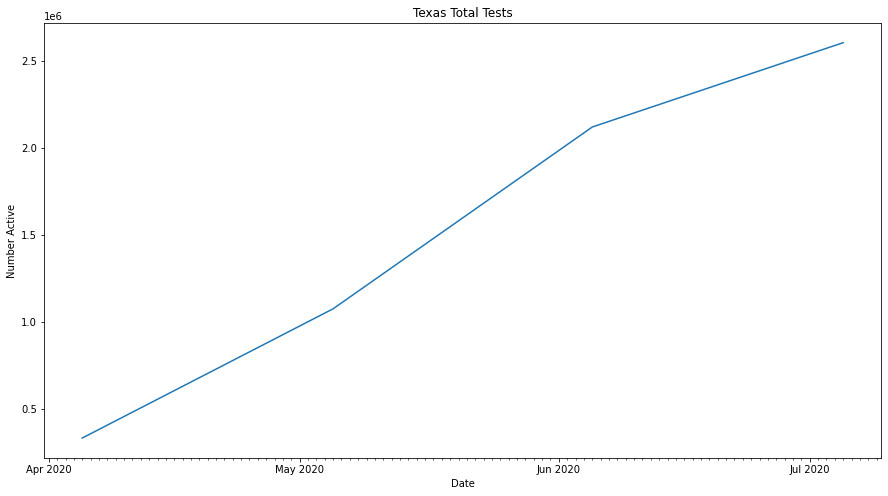

In [42]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Active',color='black')
plt.plot(c)
plt.title('Texas Total Tests')
plt.savefig('TexasTotalTests.png')

In [43]:
c

,Tests
Date,
2020-04-05,330300.0
2020-05-05,1073491.0
2020-06-05,2119036.0
2020-07-05,2603903.0


In [44]:
x = c.diff(periods = 1)

In [49]:
x[1:]

,Daily Tests
Date,
2020-05-05,743191.0
2020-06-05,1045545.0
2020-07-05,484867.0


In [46]:
x.rename(columns={'Tests':'Daily Tests'}, inplace = True)

In [48]:
x

,Daily Tests
Date,
2020-04-05,NaN
2020-05-05,743191.0
2020-06-05,1045545.0
2020-07-05,484867.0


TypeError: only size-1 arrays can be converted to Python scalars

Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator at

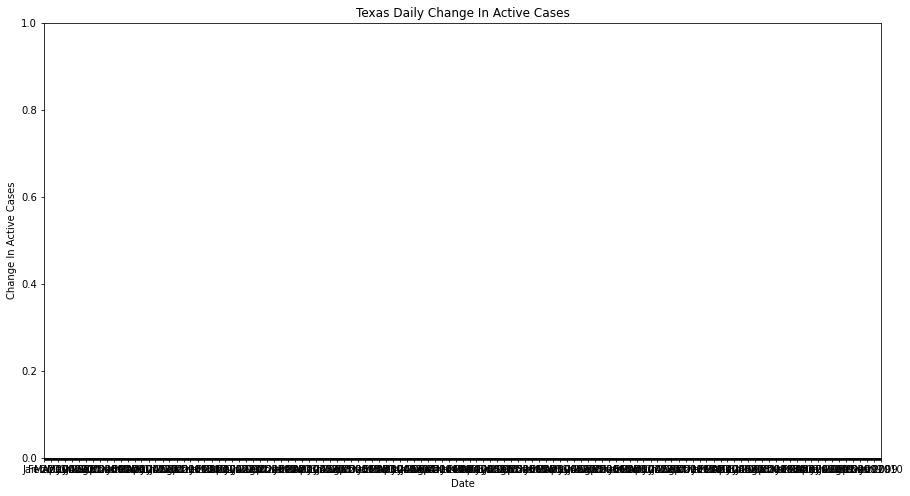

In [47]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Change In Active Cases',color='black')
plt.title('Texas Daily Change In Active Cases')
plt.bar(x.index,x)
fig.savefig('TexasChangeInActiveCases.png')

In [ ]:
x